# Machine Learning Hands on Course (Skill Share)

## Data Exploration using seabron

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


In [4]:
data = sns.load_dataset('tips')

In [5]:
df = pd.DataFrame(data)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


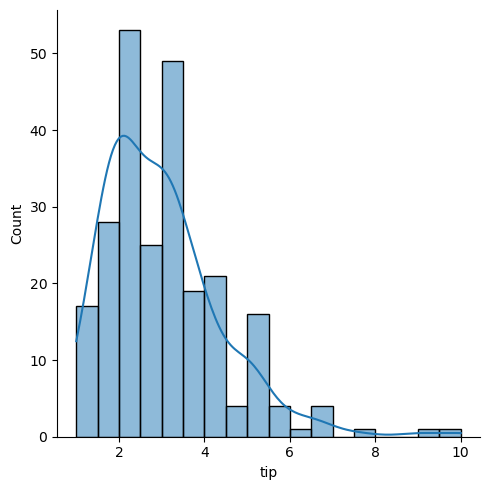

In [6]:
# Plotting the distribution of the data
sns.displot(df['tip'], kde=True)

<Axes: >

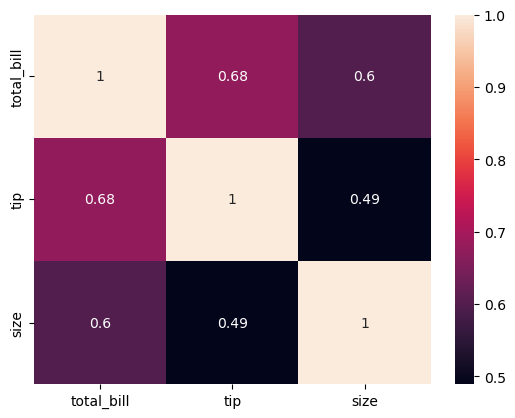

In [7]:
# Drawing a heatmap
# But first we make sure that we create a correlated matrix of the data first
# dropping all string content column (axis=1 means deleting the whole column, axis=0 means rows)
df2 = df.drop('sex', axis=1).drop('smoker', axis=1).drop('day', axis=1).drop('time', axis=1)
correlated_matrix = df2.corr()
# annot=True to add the numbers in the boxes
sns.heatmap(data=correlated_matrix, annot=True)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


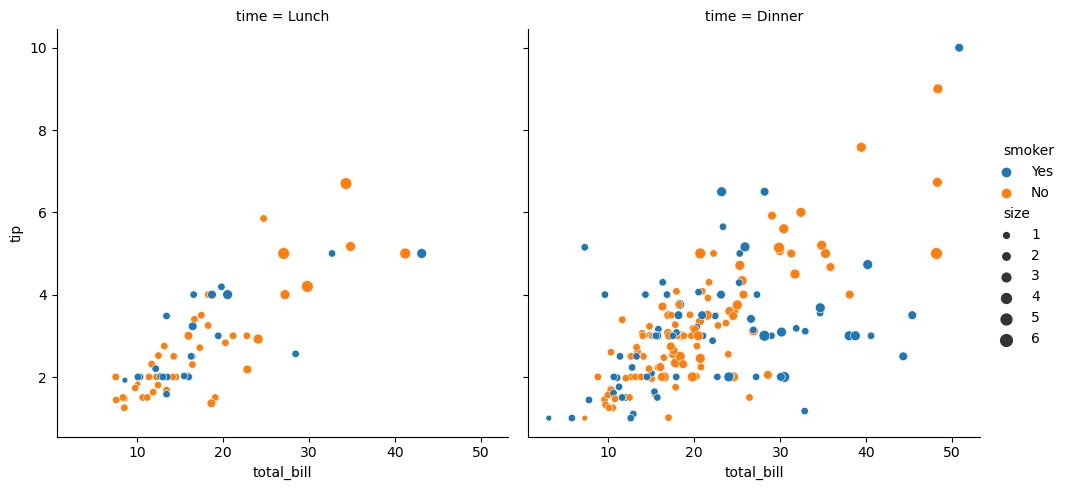

In [8]:
sns.relplot(x='total_bill', y='tip', data = df, col='time', hue='smoker', size='size')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


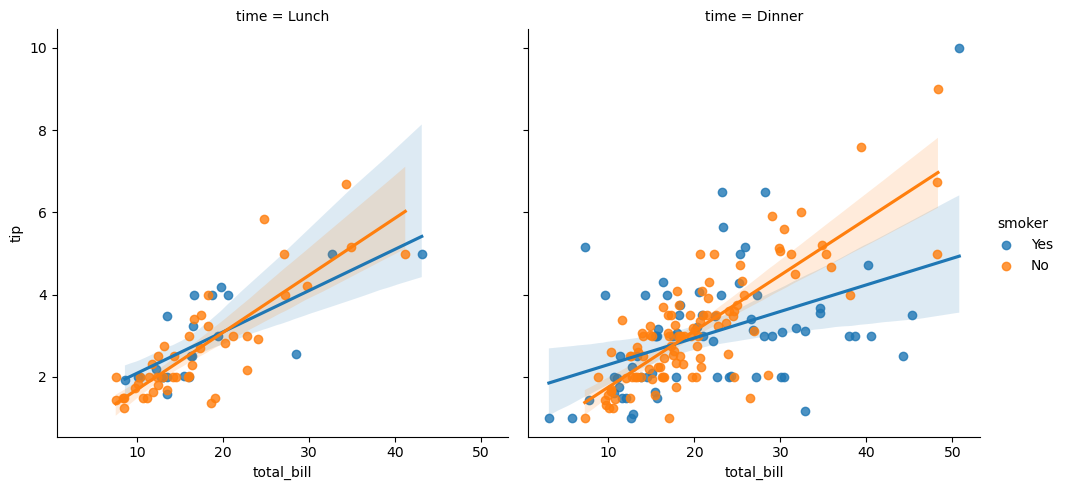

In [9]:
# creating a regression line
sns.lmplot(x='total_bill', y='tip', data=df, col='time', hue='smoker')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


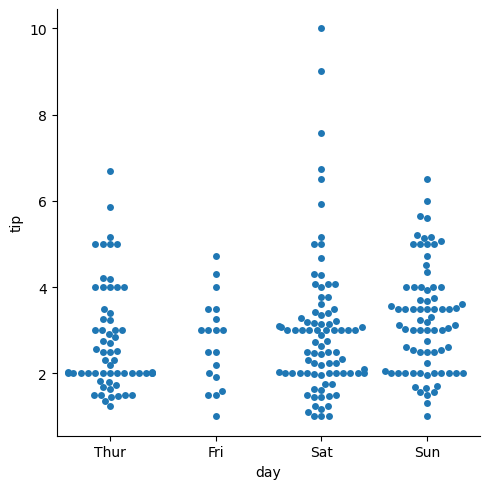

In [10]:
# cat plot
sns.catplot(x='day', y='tip',data=df, kind='swarm')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


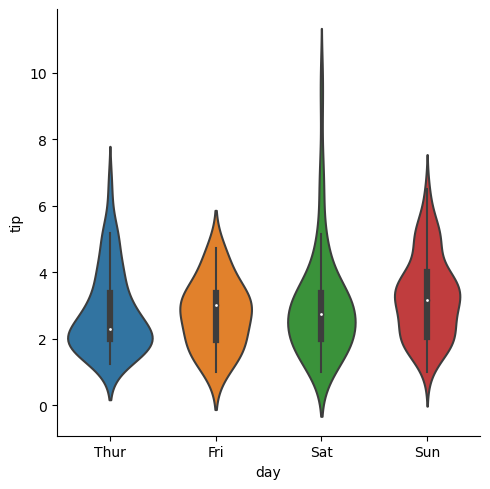

In [11]:
sns.catplot(x='day', y='tip',data=df, kind='violin')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


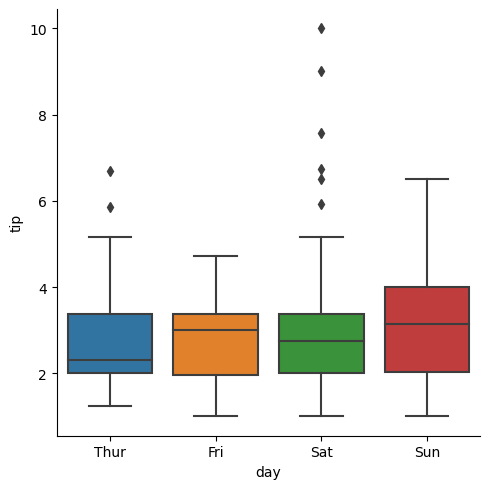

In [12]:
sns.catplot(x='day', y='tip',data=df, kind='box')

## Data PreProccessing

In [14]:
# Describing the data
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
# Converting string value to a numerical representation
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['day'] = label_encoder.fit_transform(df['day'])
df['time'] = label_encoder.fit_transform(df['time'])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


<Axes: >

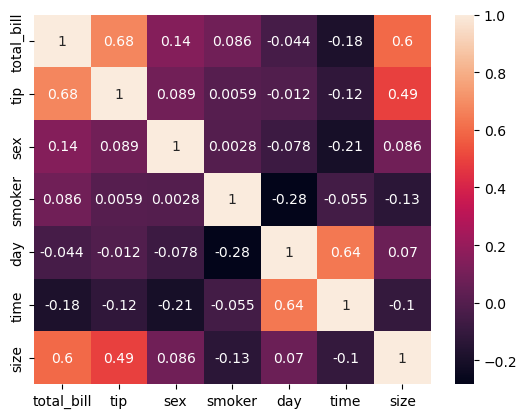

In [16]:
# new correlation matrtix for heatmap
new_corr_matrix = df.corr()
sns.heatmap(new_corr_matrix, annot=True)

In [17]:
# splitting the data for features and target
y=df['tip']
x=df.drop('tip', axis=1)

In [18]:
# Splitting the data for training data and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_trainn, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

## Simple Linear Regression

In [ ]:
"""
Simple Linear Regression is a statistical method used to model the relationship 
between two continuous variables by fitting a linear equation to the observed data. 
The main goal is to predict the value of a dependent variable (Y) based on the value 
of an independent variable (X).

Key components of simple linear regression include:

1. **Equation of the Line**: The relationship is modeled using the equation:
   Y = β0 + β1 * X + ε
   where:
   - Y is the dependent variable (what we are trying to predict).
   - X is the independent variable (the predictor).
   - β0 is the y-intercept (the value of Y when X is 0).
   - β1 is the slope of the line (the change in Y for a one-unit change in X).
   - ε is the error term (the difference between the observed and predicted values).

2. **Assumptions**: Simple linear regression relies on several assumptions:
   - Linearity: The relationship between X and Y is linear.
   - Independence: The residuals (errors) are independent.
   - Homoscedasticity: The residuals have constant variance at all levels of X.
   - Normality: The residuals are normally distributed.

3. **Fitting the Model**: The model is typically fitted using the least squares method, which minimizes the sum of the squared differences between the observed values and the values predicted by the model.

4. **Evaluation**: The performance of the model can be evaluated using metrics such as R-squared, which indicates the proportion of variance in the dependent variable that can be explained by the independent variable.

5. **Applications**: Simple linear regression is widely used in various fields, including economics, biology, engineering, and social sciences, for tasks such as forecasting, trend analysis, and causal inference.

Overall, simple linear regression provides a straightforward way to understand and predict relationships between two variables.
"""

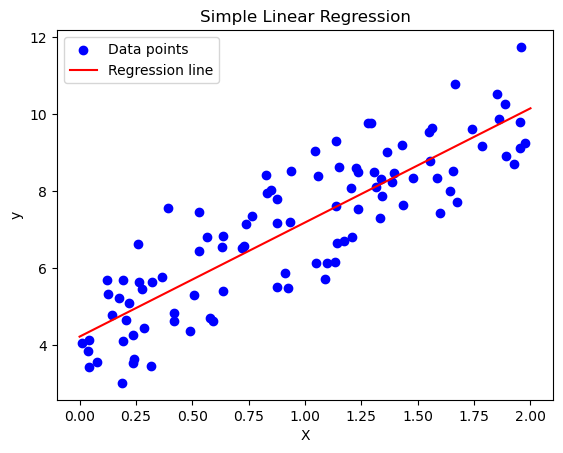

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create a simple dataset
# For example, let's create some synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Features
y = 4 + 3 * X + np.random.randn(100, 1)  # Target with some noise

# Step 2: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Make predictions
X_new = np.array([[0], [2]])  # New data for predictions
y_predict = model.predict(X_new)

# Step 4: Plot the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_predict, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

## Multiple Linear Regression

In [ ]:
"""
Simple linear regression is a statistical method used to model the relationship between two variables by fitting a linear equation to observed data. 

In simple linear regression, we have one independent variable (predictor) and one dependent variable (response). The goal is to find the best-fitting straight line (regression line) that describes how the dependent variable changes as the independent variable changes.

The equation of the regression line can be expressed as:
    Y = β0 + β1 * X + ε
Where:
    Y = dependent variable (response)
    X = independent variable (predictor)
    β0 = y-intercept of the regression line
    β1 = slope of the regression line (indicates the change in Y for a one-unit change in X)
    ε = error term (captures the variability in Y that cannot be explained by X)

The method typically involves minimizing the sum of the squared differences between the observed values and the values predicted by the model (least squares method). 

Once the model is fitted, it can be used for prediction, and various metrics (like R-squared, p-values) can be used to evaluate the model's performance and the significance of the predictors.
"""

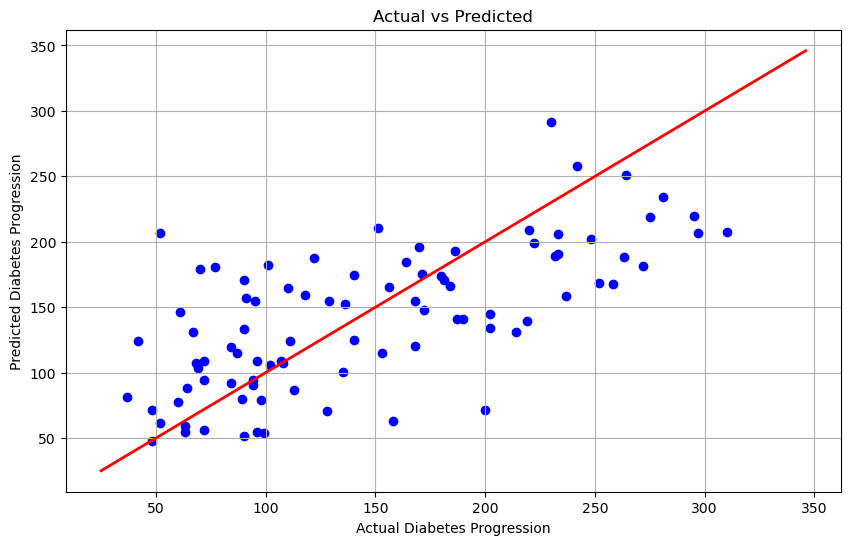

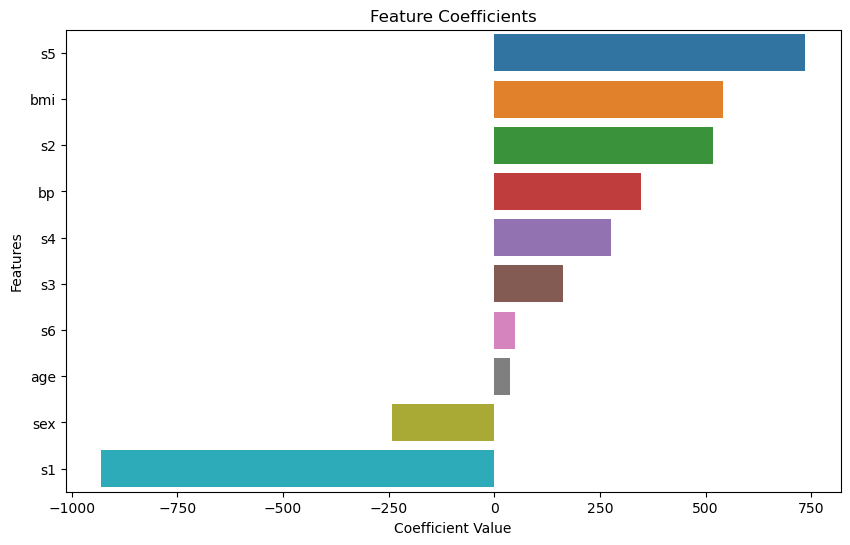

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the diabetes dataset from sklearn
data = datasets.load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.grid()
plt.show()

# Visualizing the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.Coefficient, y=coefficients.index)
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [ ]:
# How to know which factors affect a feature?
# if you have multple features and want to know whivh features greatly affect the dependent var
# we can use the Variance Inflation Factor (VIF)
# or we can use df.corr() if we want to do it manually
# Sample code for VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print(vif_data.sort_values(by="VIF", ascending=False))

  Feature        VIF
4      s1  59.202510
5      s2  39.193370
6      s3  15.402156
8      s5  10.075967
7      s4   8.890986
2     bmi   1.509437
9      s6   1.484623
3      bp   1.459428
1     sex   1.278071
0     age   1.217307


In [49]:
# VIF is a measure of how much the variance of a regression coefficient is inflated due to multicollinearity.
# Multicollinearity occurs when two or more predictor variables in a multiple regression model are highly correlated.
# A high VIF indicates that the feature is highly correlated with other features, which can affect the stability and interpretability of the regression coefficients.

In [55]:
# LAST STEP
# Backward Elimanation

#Backward elimination is a feature selection method used in regression analysis to remove 
#features that do not contribute significantly to the model. This process involves fitting 
#the model with all features and then iteratively removing the least significant feature 
#until only significant features remain.

#An Ordinary Least Squares (OLS) regression model is fitted using the training data, 
#and the summary of the model is printed to observe the initial p-values of the features.

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the diabetes dataset from sklearn
data = datasets.load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (intercept)
X_train_with_const = sm.add_constant(X_train)

# Fit the model using statsmodels
model = sm.OLS(y_train, X_train_with_const).fit()

# Display the summary of the regression model
print(model.summary())

# Backward elimination process
# Set a significance level (alpha) for feature removal
alpha = 0.05

# Create a list of features to consider for elimination
features = X_train.columns.tolist()

# Initialize a loop to perform backward elimination
while True:
    # Fit the model with the current set of features
    X_train_with_const = sm.add_constant(X_train[features])
    model = sm.OLS(y_train, X_train_with_const).fit()
    
    # Get the p-values of the features
    p_values = model.pvalues[1:]  # Exclude the constant term
    
    # Find the maximum p-value
    max_p_value = p_values.max()
    
    # If the maximum p-value is greater than the significance level, remove the corresponding feature
    if max_p_value > alpha:
        feature_to_remove = p_values.idxmax()  # Get the feature with the highest p-value
        features.remove(feature_to_remove)  # Remove it from the list
        print(f"Removing {feature_to_remove} with p-value {max_p_value:.4f}")
    else:
        break  # Exit the loop if all features are significant

# Final model after backward elimination
X_train_final = sm.add_constant(X_train[features])
final_model = sm.OLS(y_train, X_train_final).fit()

# Display the summary of the final regression model
print("\nFinal model after backward elimination:")
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           5.41e-50
Time:                        18:34:22   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.3456      2.902     52.155      0.0

In [57]:
# Train the final model using LinearRegression
X_train_final = X_train[features]
model = LinearRegression()
model.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test[features])

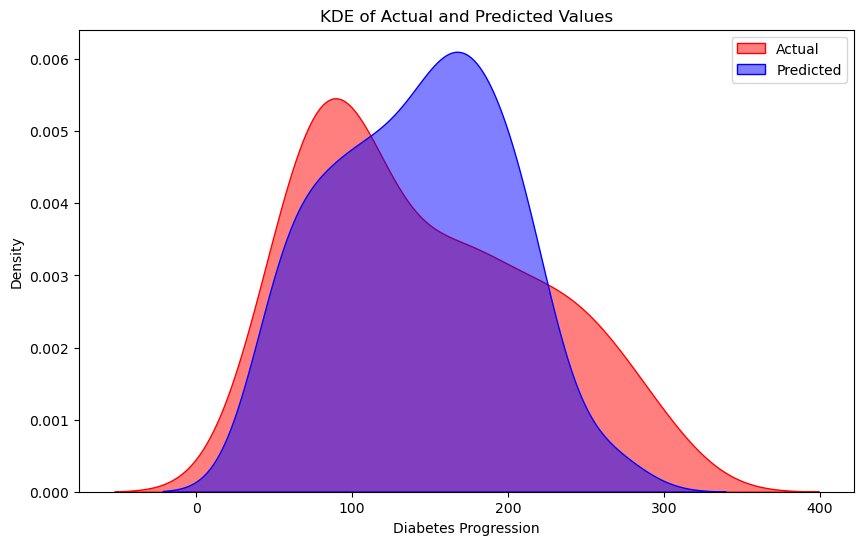

In [73]:
# Create KDE plots for actual and predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='red', label='Actual', fill=True, alpha=0.5)
sns.kdeplot(y_pred, color='blue', label='Predicted', fill=True, alpha=0.5)
plt.title('KDE of Actual and Predicted Values')
plt.xlabel('Diabetes Progression')
plt.ylabel('Density')
plt.legend()
plt.show()

## Polynomial Linear Regression

In [ ]:
'''
Polynomial Linear Regression

Polynomial Linear Regression is an extension of simple linear regression that allows modeling the relationship between the independent variable (X) and the dependent variable (Y) as an nth degree polynomial. This is particularly useful when the data exhibits a non-linear relationship.

## Key Differences:

1. **Simple Linear Regression**:
   - Models the relationship between X and Y using a straight line equation: Y = β0 + β1 * X
   - Assumes a linear relationship between the variables

2. **Multiple Linear Regression**:
   - Models the relationship between Y and multiple independent variables (X1, X2, ..., Xn)
   - Uses a hyperplane equation: Y = β0 + β1 * X1 + β2 * X2 + ... + βn * Xn

3. **Polynomial Regression**:
   - Extends linear regression by including polynomial terms (X^2, X^3, ..., X^n) to capture non-linear relationships
   - The equation becomes: Y = β0 + β1 * X + β2 * X^2 + β3 * X^3 + ... + βn * X^n
   - Allows modeling more complex patterns in the data
'''

In [82]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Polynomial Regression model
degree = 2  # Set the degree of the polynomial
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on the training data
poly_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (Degree {}):".format(degree))
print("Mean Squared Error:", mse_poly)
print("R-squared:", r2_poly)

Polynomial Regression (Degree 2):
Mean Squared Error: 0.4643015053487324
R-squared: 0.6456819870297186


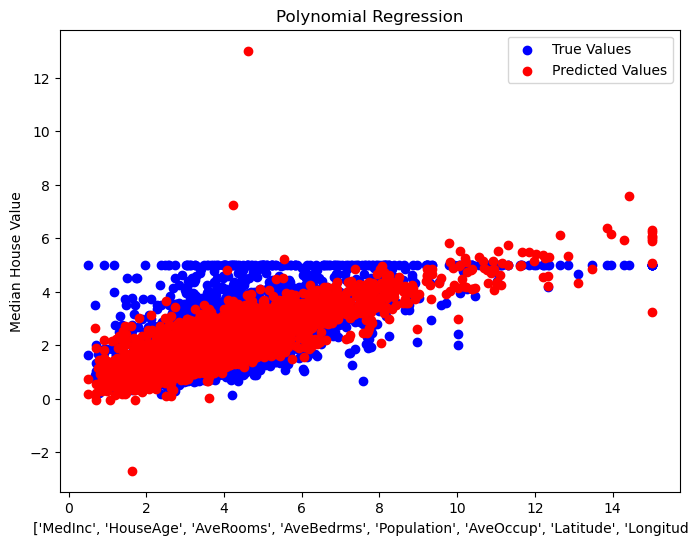

In [84]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='True Values')
plt.scatter(X_test[:, 0], y_pred_poly, color='red', label='Predicted Values')
plt.xlabel(california.feature_names)
plt.ylabel('Median House Value')
plt.title('Polynomial Regression')
plt.legend()
plt.show()